[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nvidad/csc448ai/blob/main/Assignment%204%20-%20Judging%20Flowers.ipynb)

*I'm not sure why the name here in Colab doesn't match the notebook's name hosted on Github, I tried renaming and re-uploading the notebook, but it still says "Untitled1.ipynb".*

In [79]:
# Imports and pip installations (if needed)
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Part 1: Load the dataset

In [25]:
# Load the dataset (load remotely, not locally)
iris = datasets.load_iris(as_frame=True)

# data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# data = pd.DataFrame(data=iris.data)
# # Output the first 15 rows of the data
print(iris.frame.head(15))

# # Display a summary of the table information (number of datapoints, etc.)
print(iris.frame.describe())


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

## About the dataset
Explain what the data is in your own words. What are your features and labels? What is the mapping of your labels to the actual classes?

# Part 2: Split the dataset into train and test

In [26]:
# Take the dataset and split it into our features (X) and label (y)
X = iris.data
y = iris.target

# Use sklearn to split the features and labels into a training/test set. (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=48)


# Part 3: Logistic Regression

In [74]:
# i. Use sklearn to train a LogisticRegression model on the training set
clf = LogisticRegression(max_iter=200, random_state=48).fit(X_train, y_train)

# ii. For a sample datapoint, predict the probabilities for each possible class
print(clf.predict_proba(X)[48])

# iii. Report on the score for Logistic regression model, what does the score measure?
print(clf.score(X_test, y_test))

# iv. Extract the coefficents and intercepts for the boundary line(s)
print(f"Coefficients: {clf.coef_}\nIntercept: {clf.intercept_}")

[9.76272146e-01 2.37278149e-02 3.90245091e-08]
0.9333333333333333
Coefficients: [[-0.42740226  0.95691073 -2.42781076 -1.0431407 ]
 [ 0.54744737 -0.37147918 -0.17226111 -0.94508974]
 [-0.12004511 -0.58543155  2.60007186  1.98823044]]
Intercept: [  9.49239172   2.12070322 -11.61309495]


The score for the Logistic Regression model is 0.93. The score measures how well the model fits the data and can predict future values.

# Part 4: Support Vector Machine

In [76]:
# i. Use sklearn to train a Support Vector Classifier on the training set
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True, random_state=48))
clf.fit(X_train, y_train)

# ii. For a sample datapoint, predict the probabilities for each possible class
print(clf.predict_proba(X)[48])

# iii. Report on the score for the SVM, what does the score measure?
print(clf.score(X_test, y_test))

[0.96820789 0.01884561 0.01294651]
1.0


The score for the SVM model is 1.0.

# Part 5: Neural Network

In [77]:
# i. Use sklearn to train a Neural Network (MLP Classifier) on the training set
clf = MLPClassifier(random_state=48, max_iter=600).fit(X_train, y_train)

# ii. For a sample datapoint, predict the probabilities for each possible class
print(clf.predict_proba(X)[48])

# iii. Report on the score for the Neural Network, what does the score measure?
print(clf.score(X_test, y_test))

# iv: Experiment with different options for the neural network, report on your best configuration (the highest score I was able to achieve was 0.8666)

[9.99605099e-01 3.94900693e-04 1.39636411e-10]
0.9333333333333333


The score for the neural network is 0.93.

# Part 6: K-Nearest Neighbors

[1. 0. 0.]
Score for kNN with k=5: 1.0
Using k-values ranging 1-50, k = 3 yields a max score of 1.0


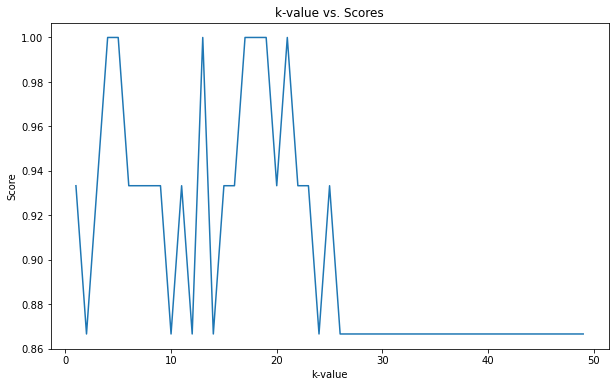

In [82]:
# i. Use sklearn to 'train' a k-Neighbors Classifier
# Note: KNN is a nonparametric model and technically doesn't require training
# fit will essentially load the data into the model see link below for more information
# https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ii. For a sample datapoint, predict the probabilities for each possible class
print(knn.predict_proba(X)[48])

# iii. Report on the score for kNN, what does the score measure?
print(f"Score for kNN with k=5: {knn.score(X_test, y_test)}")

scores = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,50), scores)
plt.title('k-value vs. Scores')
plt.xlabel('k-value')
plt.ylabel('Score')
print(f"Using k-values ranging 1-50, k = {scores.index(max(scores))} yields a max score of {max(scores)}")

The score for kNN with k=3 is 1.0.

Based on the resulting plot graph and range of k-values, scores are sporadic, with common scores of 0.86, 0.93 and 1.0. Scores are generally high when 1 <= k <= 25, then score drops to 0.86 when k > 25. 

# Part 7: Conclusions and takeaways

In your own words describe the results of the notebook. Which model(s) performed the best on the dataset? Why do you think that is? Did anything surprise you about the exercise?

This notebook showcases several machine learning algorithms used to train a model using the iris dataset. All algorithms yielded scores of 0.93 and above, with SVC and kNN yielding scores of 1.0. While 1.0 scores mean the models perfectly fit the data, there may be concerns of overfitting. The iris dataset is known to be a dataset where each of classes of flowers are largely grouped together, so with models that work best with this kind of dataset, high scores are to be expected. The biggest surprise for me is the large variance of scores when testing a range of k-values. It was interesting to see in which range of k-values the kNN algorithm performs best, or in this case, which k-values perform similarly. It is important to understand how different ML algorithms perform on a specific dataset, as well as potentially differently distributed datasets.